# Task: Petrol price forecasting with LSTM

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

import utils

In [3]:
np.random.seed(1)

In [4]:
df = pd.read_csv('wfp_food_prices_nigeria.csv')
df.head()

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn,default
0,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,NaN,#item+code,NaN,NaN,#item+type+code,#meta+id,NaN
1,2015-01-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
2,2015-02-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
3,2015-03-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN
4,2015-04-15,Bread - Retail,Unit,cereals and tubers,140.0,NGN,Nigeria,Adamawa,2211,Mubi,1980.0,55,15.0,33.0,1,1980_55_15_33,NaN


In [5]:
df.shape

(45577, 17)

In [6]:
df.isnull().sum()

date            0
cmname          0
unit            0
category        0
price           0
currency        0
country         0
admname         0
adm1id          0
mktname         0
mktid           1
cmid            0
ptid            1
umid            1
catid           0
sn              0
default     45577
dtype: int64

In [7]:
df['cmname'].unique()

array(['#item+name', 'Bread - Retail', 'Oil (palm) - Wholesale',
       'Oil (palm) - Retail', 'Rice (imported) - Wholesale',
       'Rice (imported) - Retail', 'Maize (white) - Wholesale',
       'Maize (white) - Retail', 'Rice (local) - Wholesale',
       'Rice (local) - Retail', 'Millet - Wholesale', 'Millet - Retail',
       'Yam - Wholesale', 'Yam - Retail',
       'Groundnuts (shelled) - Wholesale',
       'Groundnuts (shelled) - Retail', 'Sorghum (white) - Wholesale',
       'Sorghum (white) - Retail', 'Maize (yellow) - Wholesale',
       'Maize (yellow) - Retail', 'Fuel (diesel) - Retail',
       'Fuel (petrol-gasoline) - Retail', 'Cowpeas (white) - Wholesale',
       'Cowpeas (white) - Retail', 'Cowpeas (brown) - Wholesale',
       'Cowpeas (brown) - Retail', 'Sorghum (brown) - Wholesale',
       'Sorghum (brown) - Retail',
       'Cassava meal (gari, yellow) - Wholesale',
       'Cassava meal (gari, yellow) - Retail', 'Gari (white) - Wholesale',
       'Gari (white) - Retail'

I am only interested in the Diesel commodity.
It is written as 'Fuel (diesel) - Retail' under in cmname column

In [8]:
_, petrol = utils.process_data(df, 'Fuel (petrol-gasoline) - Retail')
petrol.head()

,price
date,
2014-05-15,97.0
2014-07-15,97.0
2014-08-15,97.0
2014-09-15,97.0
2014-10-15,97.0


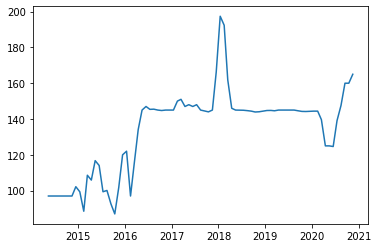

In [9]:
plt.plot(petrol)

In [10]:
petrol.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77 entries, 2014-05-15 to 2020-11-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   77 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB


## petrol

monthly data from 2014 - 2020; 7 years, 77 months

Convert data from time series to supervised learning.
This can be done by creating look back features from the data. The number of look backs created can vary

In [11]:
price = petrol['price'].values.reshape(-1, 1)
price[:5]

array([[97.],
       [97.],
       [97.],
       [97.],
       [97.]])

In [12]:
#initialize scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

scaler = scaler.fit(price)

In [13]:
#scale data
scaled_data = scaler.transform(price)
scaled_data[:5]

array([[-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058]])

In [14]:
scaled_data.shape

(77, 1)

In [15]:
scaled_data.shape

(77, 1)

In [16]:
#make into supervised learning
data_with_lag = utils.timeseries_to_supervised(scaled_data)
data_with_lag.columns = ['price', 'lag_1']
data_with_lag.head()

,price,lag_1
0,0.000000,-0.818841
1,-0.818841,-0.818841
2,-0.818841,-0.818841
3,-0.818841,-0.818841
4,-0.818841,-0.818841


In [17]:
#separate into feature and target sets
X, y = utils.feature_target(data_with_lag)

In [18]:
X[:5]

array([[[-0.81884058]],

       [[-0.81884058]],

       [[-0.81884058]],

       [[-0.81884058]],

       [[-0.81884058]]])

In [19]:
y[:5]

array([[ 0.        ],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058],
       [-0.81884058]])

Build LSTM Model

In [20]:
model = utils.build_LSTM(X)

In [21]:
history = model.fit(X, y, epochs=100, batch_size=1, verbose=1, shuffle=False)

Epoch 1/100
77/77 [==============================] - 3s 2ms/step - loss: 0.2323
Epoch 2/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0970
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0665
Epoch 4/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0552
Epoch 5/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0416
Epoch 6/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0368
Epoch 7/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0252
Epoch 8/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 9/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 10/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0318
Epoch 11/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0270
Epoch 12/100
77/77 [==============================] - 0s 2ms/step - loss: 0.0266
Epoch 13/100
77/77 [=================

Text(0.5, 1.0, 'Model Accuracy')

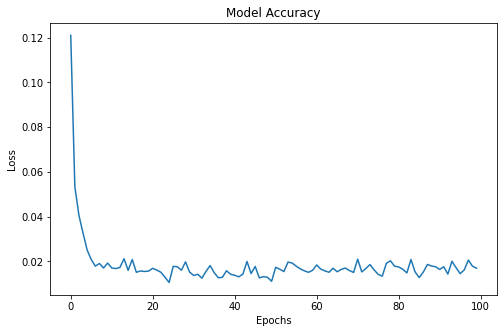

In [22]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [23]:
y_pred = model.predict(X, batch_size=1)

To check how well the model performed
- inverse transform the forecast for scaling
- create a dataframe with the date, original and the predicted data
- plot the data

In [24]:
#inverse transform prediction to get predicted price
inverted_y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1) )
inverted_y_pred[:5]

array([[138.94383],
       [112.11288],
       [ 96.56662],
       [ 91.83905],
       [ 92.08115]], dtype=float32)

In [25]:
df = pd.DataFrame()

df['date'] = petrol.index
df['price'] = list(petrol['price'])
df['predicted_price'] = inverted_y_pred
df.head()

,date,price,predicted_price
0,2014-05-15,97.0,138.943832
1,2014-07-15,97.0,112.112877
2,2014-08-15,97.0,96.566620
3,2014-09-15,97.0,91.839050
4,2014-10-15,97.0,92.081146


In [26]:
mean_squared_error(df['price'], df['predicted_price'])

82.15587872867164

In [27]:
#rmse
np.sqrt(mean_squared_error(df['price'], df['predicted_price']))

9.063988014592232

In [28]:
r2_score(df['price'], df['predicted_price'])

0.8472768034266374

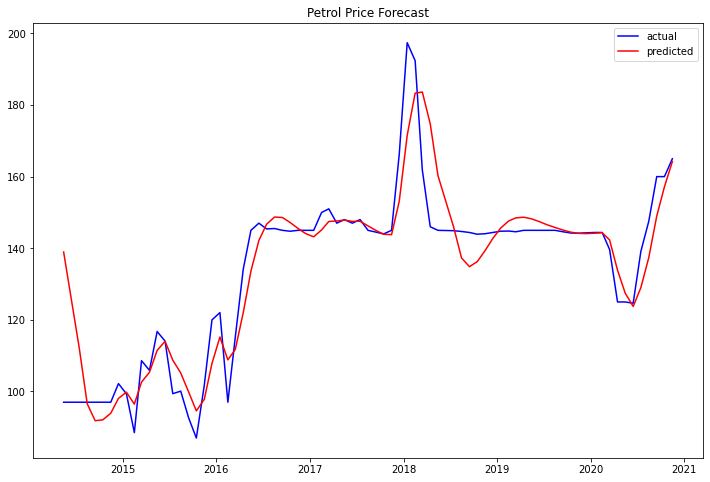

In [29]:
df.set_index('date', inplace=True)

plt.figure(figsize=(12,8))
plt.plot(df['price'], color="blue", label="actual")
plt.plot(df['predicted_price'], color="red", label="predicted")
plt.title("Petrol Price Forecast")
plt.legend()

The model did not perform as well as it did on the diesel data here on the petrol data, so it probably needs to more finetuning, but it still did reasonably well with an RMSE Score of 9.06 and r2 score of 84.7% on the existing data.

## Future Prediction

I will be predicting diesel prices 3 years into the future, 2021, 2022, 2023. That is 36 months.

In [30]:
num_prediction = 36  #3 years, 36 months

price_data = scaler.transform([petrol['price']]).reshape(-1)
price_data[:5]

array([-0.81884058, -0.81884058, -0.81884058, -0.81884058, -0.81884058])

In [31]:
price_data.shape

(77,)

In [32]:
forecast = utils.forecast(num_prediction, model, price_data, look_back=1)
forecast_dates = utils.forecast_dates(petrol, num_prediction, frequency = 'MS')

In [33]:
forecast_dates[:5]

[Timestamp('2020-12-01 00:00:00', freq='MS'),
 Timestamp('2021-01-01 00:00:00', freq='MS'),
 Timestamp('2021-02-01 00:00:00', freq='MS'),
 Timestamp('2021-03-01 00:00:00', freq='MS'),
 Timestamp('2021-04-01 00:00:00', freq='MS')]

In [34]:
forecast

array([0.41304348, 0.47545296, 0.53034258, 0.56871504, 0.59313977,
       0.6075151 , 0.61700171, 0.62753385, 0.64513135, 0.6754244 ,
       0.72383064, 0.79673672, 0.90420228, 1.06499732, 1.31142974,
       1.66577303, 2.03702545, 2.2536602 , 2.33401489, 2.37900019,
       2.4268136 , 2.47776461, 2.52220583, 2.55340958, 2.5718298 ,
       2.58166456, 2.5867548 , 2.58943796, 2.59092236, 2.5917964 ,
       2.59234524, 2.59270334, 2.59294319, 2.59310007, 2.59319782,
       2.59324598, 2.59325886])

In [35]:
len(forecast_dates)

37

In [36]:
#inverse transform forecast and reshape
forecast = scaler.inverse_transform(forecast.reshape(-1, 1))
forecast

array([[165.        ],
       [168.44500337],
       [171.47491035],
       [173.59306998],
       [174.94131517],
       [175.73483334],
       [176.25849452],
       [176.83986869],
       [177.8112505 ],
       [179.48342671],
       [182.15545135],
       [186.17986679],
       [192.11196599],
       [200.98785181],
       [214.59092159],
       [234.15067148],
       [254.64380493],
       [266.60204315],
       [271.03762207],
       [273.52081032],
       [276.16011086],
       [278.97260628],
       [281.4257618 ],
       [283.14820862],
       [284.16500473],
       [284.70788383],
       [284.9888649 ],
       [285.13697548],
       [285.21891403],
       [285.26716118],
       [285.29745712],
       [285.3172245 ],
       [285.33046417],
       [285.33912392],
       [285.34451981],
       [285.34717827],
       [285.34788895]])

In [37]:
len(forecast)

37

In [38]:
future = pd.DataFrame()

future['date'] = list(forecast_dates)
future['predicted_price'] = forecast
future.set_index('date', inplace=True)
future.head()

,predicted_price
date,
2020-12-01,165.000000
2021-01-01,168.445003
2021-02-01,171.474910
2021-03-01,173.593070
2021-04-01,174.941315


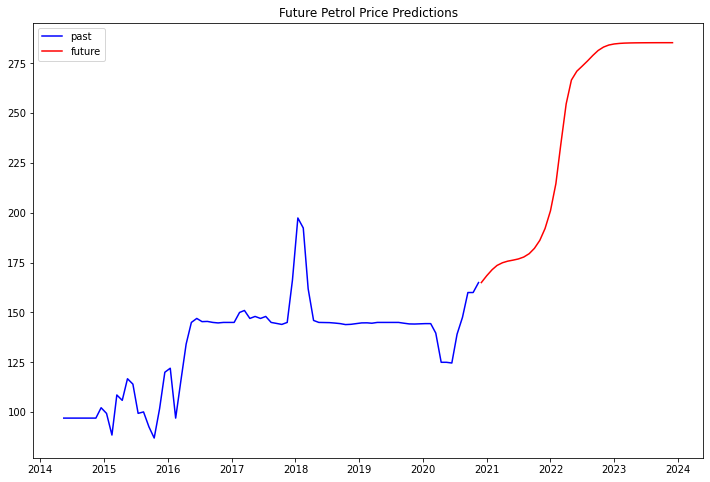

In [39]:
plt.figure(figsize=(12,8))

plt.plot(petrol['price'], c='blue', label='past')
plt.plot(future, c='red', label='future')
plt.title('Future Petrol Price Predictions')
plt.legend()
plt.show()

## Conclusion

The LSTM Model had an r2 score of 85.75% on the existing data, and has forecasted that petrol prices will increase drastically from 2022 and continue to increase.